In [2]:
# import warning filter
from warnings import simplefilter
# ignore all future warnings 
simplefilter(action='ignore', category=FutureWarning)

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-03-20 11:57:29.535396: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 11:57:29.565310: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 11:57:29.695134: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 11:57:29.695211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 11:57:29.712501: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17001486585447400973
xla_global_id: -1
]


In [4]:
import pandas as pd
diagnosis = pd.read_csv('ICBHI_Challenge_diagnosis.csv')
diagnosis

,ID,Symptom
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


In [5]:
# Find the number of istances
diag = diagnosis.to_dict()
ids = list(diag['ID'].values())
print('Number of instances: ', len(ids))
symp = list(diag['Symptom'].values())

Number of instances:  126


In [6]:
# Audio feature
import librosa
import librosa.display

# file name
import glob

In [7]:
dataset = list()

for filename in glob.iglob('ICBHI_final_database/*'):
    if (filename[-4:] == '.wav'):
        identify =  filename.split('/')[-1][:3]
        print(identify)
        index = ids.index(int(identify))
        label = symp[index]
        duration = librosa.get_duration(filename=filename)
        print(identify, label, duration)
        if duration >= 3:
            slice_size = 3
            iterations = int((duration - slice_size) / (slice_size - 1))
            iterations += 1
            initial_offset = (duration - ((iterations*(slice_size - 1)) + 1)) / 2
            for i in range(iterations):
                offset = initial_offset + i * (slice_size - 1)
                dataset.append({
                    "filename": filename,
                    "label": label,
                    "offset": offset
                })

dataset = pd.DataFrame(dataset)
dataset.info()


176
176 COPD 20.0
156
156 COPD 20.0
138
138 COPD 20.0
198
198 COPD 20.0
174
174 COPD 20.0
176
176 COPD 20.0
211
211 COPD 20.0
157
157 COPD 65.05
205
205 COPD 20.0
156
156 COPD 20.0
146
146 COPD 20.0
133
133 COPD 20.0
149
149 Bronchiolitis 20.0
130
130 COPD 20.0
200
200 COPD 20.0
163
163 COPD 20.0
154
154 COPD 20.0
107
107 COPD 20.0
138
138 COPD 20.0
170
170 COPD 20.0
188
188 URTI 20.0
156
156 COPD 20.0
221
221 COPD 20.0
203
203 COPD 20.0
139
139 COPD 14.576
145
145 COPD 20.0
135
135 Pneumonia 20.0
135
135 Pneumonia 20.0
162
162 COPD 20.0
159
159 Healthy 20.0
223
223 COPD 32.9
145
145 COPD 20.0
170
170 COPD 20.0
151
151 COPD 20.0
107
107 COPD 20.0
222
222 COPD 69.45
200
200 COPD 20.0
112
112 COPD 33.6
106
106 COPD 20.0
205
205 COPD 20.0
170
170 COPD 20.0
186
186 COPD 20.0
200
200 COPD 20.0
118
118 COPD 18.352
124
124 COPD 17.264
114
114 COPD 20.0
221
221 COPD 20.0
104
104 COPD 15.024
107
107 COPD 20.0
172
172 COPD 20.0
148
148 URTI 20.0
106
106 COPD 20.0
135
135 Pneumonia 20.0
207
207 C

In [8]:
dataset.head()

,filename,label,offset
0,ICBHI_final_database/176_2b3_Pr_mc_AKGC417L.wav,COPD,0.5
1,ICBHI_final_database/176_2b3_Pr_mc_AKGC417L.wav,COPD,2.5
2,ICBHI_final_database/176_2b3_Pr_mc_AKGC417L.wav,COPD,4.5
3,ICBHI_final_database/176_2b3_Pr_mc_AKGC417L.wav,COPD,6.5
4,ICBHI_final_database/176_2b3_Pr_mc_AKGC417L.wav,COPD,8.5


In [9]:
import matplotlib.pyplot as plt

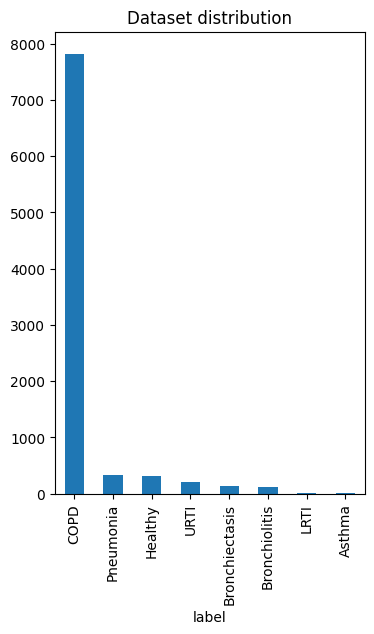

In [10]:
plt.figure(figsize=(4,6))
dataset.label.value_counts().plot(
    kind='bar',
    title='Dataset distribution'
)
plt.show()

In [11]:
# Split train and test data
from sklearn.model_selection import train_test_split
import numpy as np
train, test = train_test_split(
    dataset,
    test_size=0.2,
    random_state=42
)
print(f'Train: {len(train)}')
print(f'Test: {len(test)}')

Train: 7172
Test: 1793


In [12]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 40))
idx = 0

for label in dataset.label.unique():
    y, sr = librosa.load(dataset[dataset.label == label].filename.iloc[1], duration=3)

    # # Wave plot
    # idx += 1
    # plt.subplot(8, 3, idx)
    # plt.title("%s waveplot" % label)
    # librosa.display.waveshow(y, sr=sr, color='blue')

    # # Mel spectrogram
    # idx += 1
    # plt.subplot(8, 3, idx)
    # S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    # S_DB = librosa.power_to_db(S, ref=np.max)
    # librosa.display.specshow(S_DB, sr=sr, n_fft=512, x_axis='time', y_axis='mel')
    # plt.title('%s mel spectrogram' % label)

    # # MFCC (Mel spectrogram)
    # idx += 1
    # mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    # plt.subplot(8, 3, idx)
    # librosa.display.specshow(mfccs, x_axis='time')
    # plt.title("%s mfcc(Mel Spectrogram)" % label)

plt.show()


<Figure size 2000x4000 with 0 Axes>

In [13]:
def extract_features(audio_path, offset):
    y, sr = librosa.load(
        audio_path,
        offset=offset,
        duration=3
    )
    S = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=2048,
        hop_length=512,
        n_mels=128
    )
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    return mfcc


In [14]:
from tqdm import tqdm

In [22]:
# Extracting features for all data
x_train = []
x_test = []
for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))

x_test = (np.asarray(x_test))
x_train = (np.asarray(x_train))
print("X train:", train.shape)
print("X test:", test.shape)

100%|██████████| 1793/1793 [00:37<00:00, 47.58it/s]


X train: (7172, 3)
X test: (1793, 3)


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical


In [24]:
# Encode Labels
encoder = LabelEncoder()
encoder.fit(train.label)
y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)
# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes = np.unique(y_train),y=y_train)

In [25]:
class_weights

array([128.07142857,   7.53361345,   9.74456522,   0.1436929 ,
         3.40874525,  68.96153846,   3.34514925,   5.24269006])

In [26]:
weight = {i : class_weights[i] for i in range(8)}
weight

{0: 128.07142857142858,
 1: 7.533613445378151,
 2: 9.744565217391305,
 3: 0.1436928995031255,
 4: 3.408745247148289,
 5: 68.96153846153847,
 6: 3.345149253731343,
 7: 5.242690058479532}

In [27]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (7172, 40, 130, 1)
Y train: (7172, 8)
X test: (1793, 40, 130, 1)
Y test: (1793, 8)


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [29]:
# Create the model framework
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(len(encoder.classes_), activation='softmax'))
#Visualise the structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 129, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 64, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 63, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 31, 32)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 9, 31, 32)         0

In [30]:
# Adam optimiser is expected to give the best performance. But others can be tried.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [31]:
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test),
    shuffle=True, class_weight=weight)



Epoch 1/5
57/57 [==============================] - 3s 47ms/step - loss: 6.3887 - accuracy: 0.1695 - val_loss: 1.5703 - val_accuracy: 0.6687
Epoch 2/5
57/57 [==============================] - 2s 41ms/step - loss: 2.3165 - accuracy: 0.3066 - val_loss: 1.6920 - val_accuracy: 0.7563
Epoch 3/5
57/57 [==============================] - 3s 46ms/step - loss: 2.0638 - accuracy: 0.4502 - val_loss: 1.6583 - val_accuracy: 0.6603
Epoch 4/5
57/57 [==============================] - 3s 58ms/step - loss: 1.8194 - accuracy: 0.5778 - val_loss: 1.1565 - val_accuracy: 0.7613
Epoch 5/5
57/57 [==============================] - 3s 57ms/step - loss: 1.6896 - accuracy: 0.6235 - val_loss: 1.1065 - val_accuracy: 0.7563


Text(0.5, 1.0, 'Accuracy Curves')

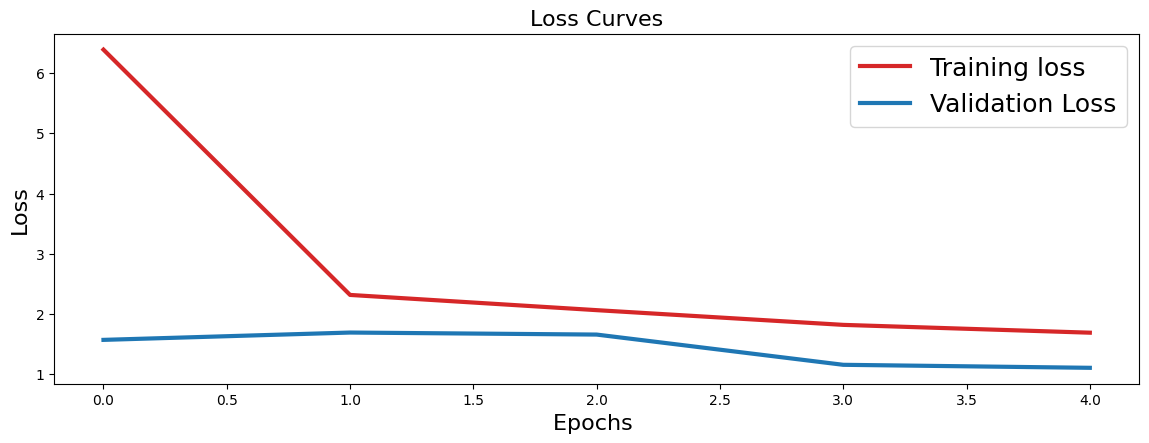

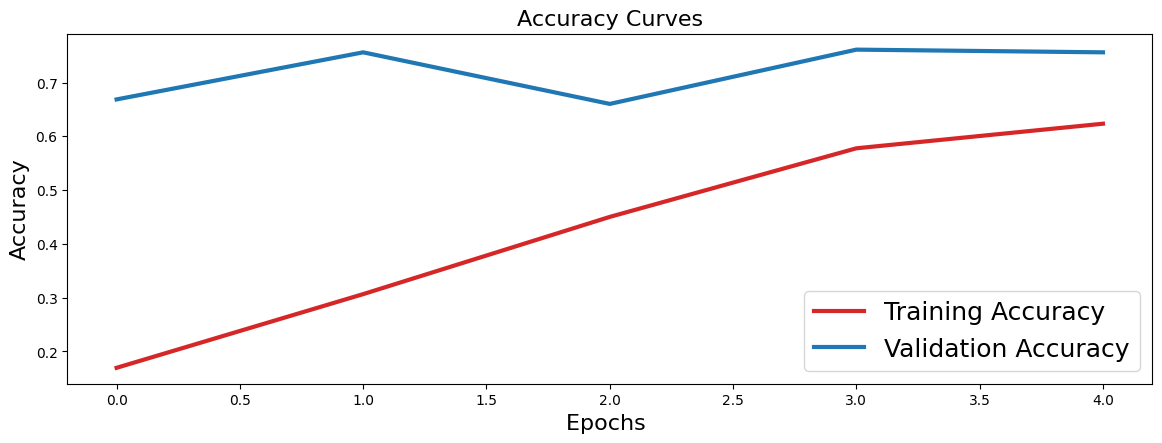

In [32]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [33]:
# Model performance on test set.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

57/57 [==============================] - 0s 4ms/step - loss: 1.1065 - accuracy: 0.7563
Test loss: 1.1065243482589722
Test accuracy: 0.756274402141571


In [34]:
# Could look at more parameters or metrics of performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [35]:
# All metrics are output here.
predictions = model.predict(x_test, verbose=1)
y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

57/57 [==============================] - 0s 3ms/step
                precision    recall  f1-score   support

        Asthma       1.00      0.01      0.03       155
Bronchiectasis       0.08      0.29      0.12         7
 Bronchiolitis       0.08      0.33      0.13         6
          COPD       0.83      0.96      0.89      1364
       Healthy       0.23      0.30      0.26        40
          LRTI       0.40      0.06      0.10        35
     Pneumonia       0.43      0.15      0.22       185
          URTI       0.03      1.00      0.05         1

      accuracy                           0.76      1793
     macro avg       0.38      0.39      0.23      1793
  weighted avg       0.77      0.76      0.71      1793



In [36]:
classes

array(['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy',
       'LRTI', 'Pneumonia', 'URTI'], dtype=object)

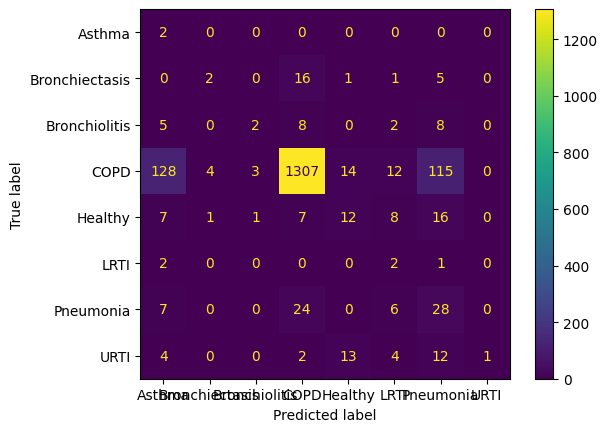

In [37]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=classes)
cm_display.plot()
plt.show()

In [38]:
# Save the model for future use.. Great idea as training takes a lot of time.
model_name = "lung.h5"
model.save(model_name)

/home/atabekdemurtaza/Documents/ARU Course/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# # load and evaluate the saved model
from tensorflow.keras.models import load_model
import numpy as np


In [40]:
# # File to be classified
classify_file = "ICBHI_final_database//113_1b1_Ll_sc_Litt3200.wav"
test_x = []
test_x.append(extract_features(classify_file,0.5))
test_x = np.asarray(test_x)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
pred = model.predict(test_x,verbose=1)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[0.01423373 0.06105624 0.15841272 0.45490706 0.04592273 0.01499019
  0.18918228 0.06129509]]


In [41]:
# Predicted Class
pred_class = model.predict(test_x)
index = np.argmax(pred_class, axis=1)
print(classes[index])

1/1 [==============================] - 0s 16ms/step
['COPD']


In [42]:
#check for correctness with the ground truth
actual = diagnosis.loc[diagnosis['ID'] == 113]
actual

,ID,Symptom
12,113,COPD


In [43]:
# Load the libraries
from tensorflow.keras.applications import vgg16, resnet
from tensorflow.keras.models import Model
import tensorflow.keras

In [44]:
vgg = vgg16.VGG16(include_top=False, weights=None, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
# adding our own custom made Flatten layer on top of pretrained vgg16 Convlayers
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

In [45]:
# Check out the status of all vgg layers so far
import pandas as pd
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7fa5cee3d250>,input_1,True
1,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa6105da8d0>,block1_conv1,True
2,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa5cefa9110>,block1_conv2,True
3,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa5ceea3810>,block1_pool,True
4,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa5cefb6810>,block2_conv1,True
5,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa5ceecf310>,block2_conv2,True
6,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fa608865450>,block2_pool,True
7,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa5ceec8dd0>,block3_conv1,True
8,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa5cef7fb50>,block3_conv2,True
9,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fa5ceee7d50>,block3_conv3,True


In [46]:
modelvgg = Sequential()
modelvgg.add(vgg_model)
modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dense(len(encoder.classes_), activation='softmax'))
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              14713536  
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 15766728 (60.15 MB)
Trainable params: 15766728 (60.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Again parameters and hyperparameters can be optimised. Here Adam optimiser is used.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
modelvgg.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [49]:
# Train the models. 150 epochs might be too long. Could try shorter duration to analyse results.
# Try early stopping criterias.
history_vgg = modelvgg.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_test, y_test), shuffle=True)

57/57 [==============================] - 252s 4s/step - loss: 0.7066 - accuracy: 0.8699 - val_loss: 0.4860 - val_accuracy: 0.8829


Text(0.5, 1.0, 'Accuracy Curves')

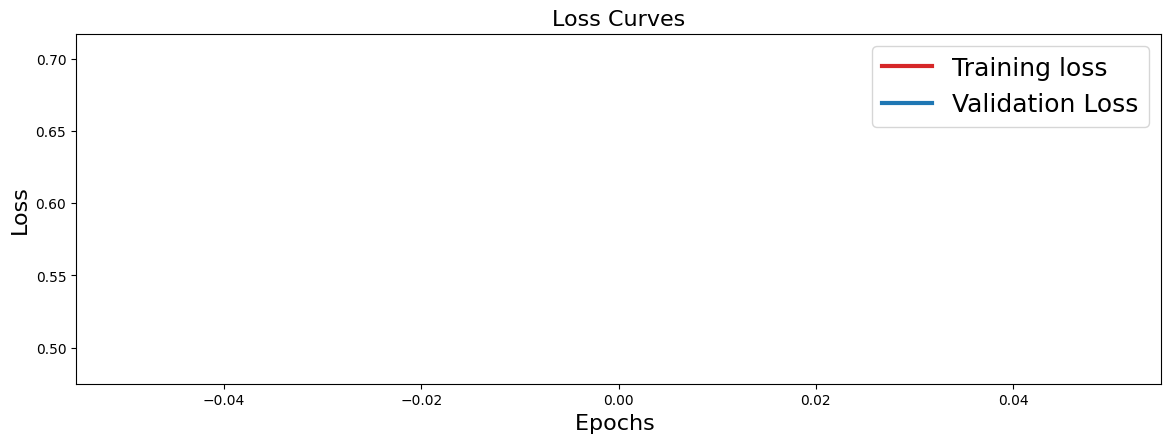

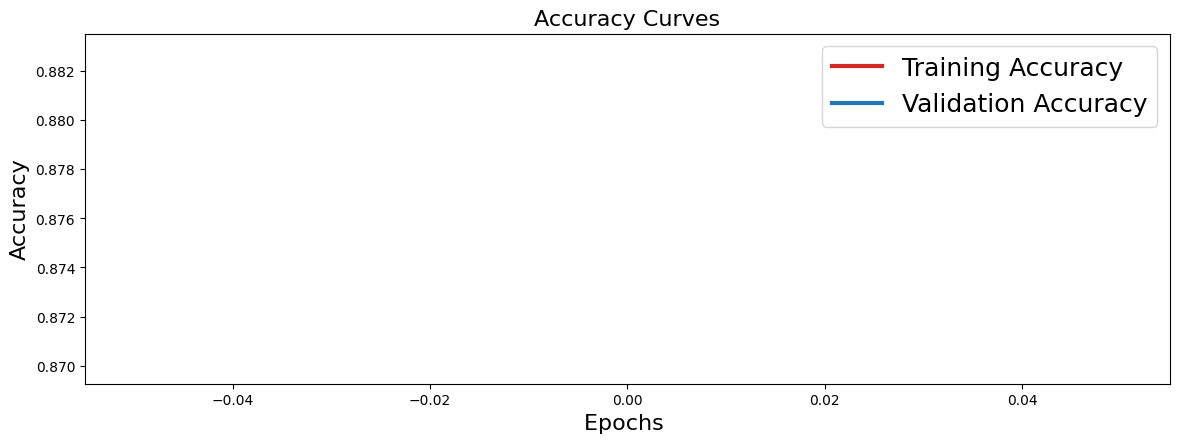

In [50]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history_vgg.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history_vgg.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history_vgg.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history_vgg.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [51]:
#Evaluate the test scores.
scores = modelvgg.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

57/57 [==============================] - 18s 310ms/step - loss: 0.4860 - accuracy: 0.8829
Test loss: 0.48597797751426697
Test accuracy: 0.8828778862953186


In [52]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [53]:
# Look at the complete report.
predictions = modelvgg.predict(x_test, verbose=1)
y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
print(classification_report(y_pred, y_true))

57/57 [==============================] - 18s 320ms/step
                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00         0
Bronchiectasis       0.00      0.00      0.00         0
 Bronchiolitis       0.00      0.00      0.00         0
          COPD       1.00      0.88      0.94      1793
       Healthy       0.00      0.00      0.00         0
          LRTI       0.00      0.00      0.00         0
     Pneumonia       0.00      0.00      0.00         0
          URTI       0.00      0.00      0.00         0

      accuracy                           0.88      1793
     macro avg       0.12      0.11      0.12      1793
  weighted avg       1.00      0.88      0.94      1793



/home/atabekdemurtaza/Documents/ARU Course/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/atabekdemurtaza/Documents/ARU Course/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/atabekdemurtaza/Documents/ARU Course/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [54]:
classes

array(['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy',
       'LRTI', 'Pneumonia', 'URTI'], dtype=object)

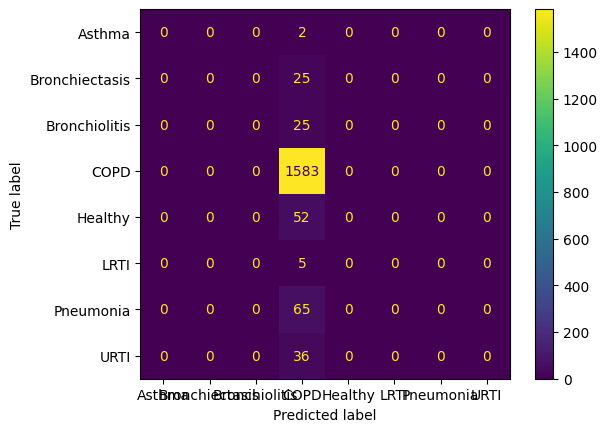

In [55]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Check which classes are confused.
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=classes)
cm_display.plot()
plt.show()